# **Hands-on Lab : Web Scraping**


## Objectives
* Extract information from a given web site 
* Write the scraped data into a csv file.

## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

Download the webpage at the url


In [3]:
data  = requests.get(url).text 

Create a soup object


In [4]:
soup = BeautifulSoup(data,"html.parser")

Scrape the `Language name` and `annual average salary`.

In [19]:
table = soup.find('table')
data = []

for row in table.find("tbody").find_all("tr")[1:]: # Skip the first row
    cols = row.find_all("td")
    if len(cols) >= 2:  # Ensure there are at least two columns
        lang = cols[1].text.strip() # Specify the column index
        avg_sal = cols[3].text.strip() # Specify the column index
        data.append([lang, avg_sal])

# Convert list to DataFrame
scraped = pd.DataFrame(data, columns=["Language", "Salary"])
print(scraped)

     Language    Salary
0      Python  $114,383
1        Java  $101,013
2           R   $92,037
3  Javascript  $110,981
4       Swift  $130,801
5         C++  $113,865
6          C#   $88,726
7         PHP   $84,727
8         SQL   $84,793
9          Go   $94,082


In [20]:
scraped['Salary'] = scraped['Salary'].str.replace(',', '').str.replace('$', '').astype(int)

In [21]:
print(scraped)

     Language  Salary
0      Python  114383
1        Java  101013
2           R   92037
3  Javascript  110981
4       Swift  130801
5         C++  113865
6          C#   88726
7         PHP   84727
8         SQL   84793
9          Go   94082


Save the scrapped data into a file named *popular-languages.csv*


In [8]:
scraped.to_csv('popular-languages.csv', index=False)

Text(0.5, 1.0, 'Programming Languages vs Salary (Sorted by Salary)')

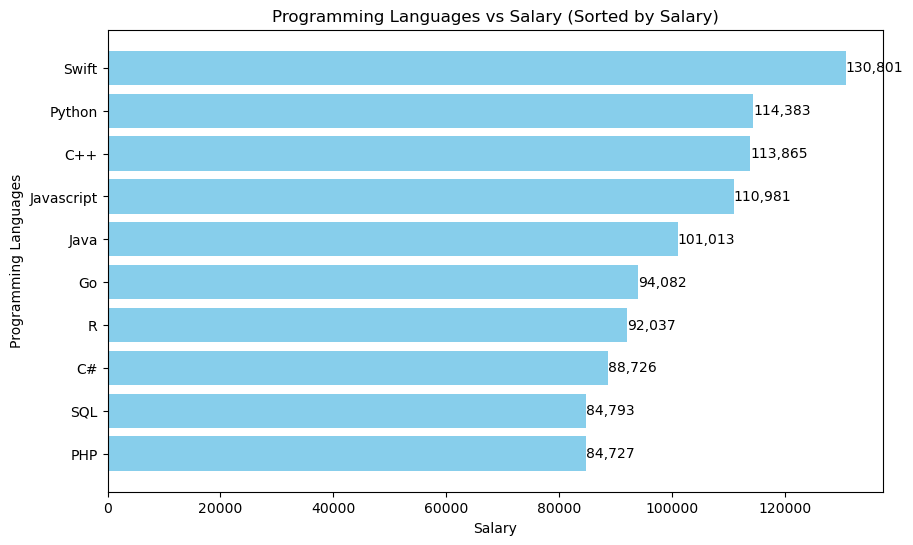

In [42]:
import matplotlib.pyplot as plt

# Sort DataFrame in descending order
a = scraped.sort_values(by="Salary", ascending=True)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(a['Language'], a['Salary'], color='skyblue')

# Add value labels
for i, v in enumerate(a['Salary']):
    plt.text(v, i, f'{v:,}', va='center')

# Labels and title
plt.xlabel("Salary")
plt.ylabel("Programming Languages")
plt.title("Programming Languages vs Salary (Sorted by Salary)")


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
